# Report the experiment consensus algorithm

### Import modules of consensus algorithm

In [136]:
from consensus.PBFT_Simulator import PBFT_Simulator
from consensus.QPBFT_Simulator import QPBFT_Simulator
from consensus.Proposed_Simulator import Proposed_Simulator
import time
import numpy as np

## Evaluatoin function

In [137]:
# All functions in this cell are Transmission Latency (TL) and Probaility of Proving Messages Successfully (PPMS) after sending requests
def evaluation_pbft_TL_PPMS(num_request:int, num_nodes:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = PBFT_Simulator(num_nodes)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

def evaluation_qpbft_TL_PPMS(num_request:int, num_managing:int, num_voting:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = QPBFT_Simulator(num_managing, num_voting)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

def evaluation_proposed_scheme_TL_PPMS(num_request:int, num_master:int, num_slave:int,  num_random:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = Proposed_Simulator(num_master, num_slave, num_random)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

In [138]:
num_requests = np.array([i for i in range(10, 301, 10)])
REQUESTS_LENGTH = num_requests.shape[0]
SEED = 100

## PBFT Algorithm

In [139]:
# delays_request_pbft = np.array([])
# probability_request_pbft = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_pbft_TL_PPMS(num_requests[i], 10)
#     delays_request_pbft = np.append(delays_request_pbft, result[0])
#     probability_request_pbft = np.append(probability_request_pbft, result[1])

result_pbft_TL_PPMS = evaluation_pbft_TL_PPMS(10, 10, 30)
result_pbft_TL_PPMS["delays"]

array([  6.4429,  13.377 ,  20.4339,  27.9105,  34.0006,  41.0498,
        47.148 ,  53.4944,  59.5576,  65.9926,  72.1858,  78.8155,
        85.5416,  92.5824,  99.0497, 106.6508, 112.802 , 118.9041,
       125.2589, 131.9437, 138.3551, 144.9042, 151.0585, 158.0688,
       164.5467, 171.724 , 177.6366, 184.8575, 190.4936, 196.872 ])

## QPBFT Algorithm

In [140]:
# delays_request_qpbft = np.array([])
# probability_request_qpbft = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_qpbft_TL_PPMS(num_requests[i], 6, 4)
#     delays_request_qpbft = np.append(delays_request_qpbft, result[0])
#     probability_request_qpbft = np.append(probability_request_qpbft, result[1])

result_qpbft_TL_PPMS = evaluation_qpbft_TL_PPMS(10, 6, 4, 30)
result_qpbft_TL_PPMS["delays"]

array([ 1.3565,  2.5182,  3.676 ,  4.9683,  6.4153,  7.4918,  8.7242,
        9.6382, 10.7073, 11.6549, 12.5776, 13.5897, 15.4836, 16.6289,
       17.7656, 19.0935, 20.9271, 21.9059, 22.8183, 23.8029, 24.7271,
       25.6517, 26.6629, 27.5827, 28.7292, 29.6797, 30.6894, 31.9822,
       33.3097, 34.2026])

## Proposed Scheme 1
> num_random = 4

In [141]:
# delays_request_proposed = np.array([])
# probability_request_proposed = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_proposed_scheme_TL_PPMS(num_requests[i], 6, 4, 4)
#     delays_request_proposed = np.append(delays_request_proposed, result[0])
#     probability_request_proposed = np.append(probability_request_proposed, result[1])

result_proposed_TL_PPMS_1 = evaluation_proposed_scheme_TL_PPMS(10, 6, 4, 4, 30)
result_proposed_TL_PPMS_1["delays"]

array([ 1.3869,  2.842 ,  4.172 , 10.4961, 11.7719, 12.93  , 14.301 ,
       18.0494, 19.3061, 20.5325, 21.7109, 22.8967, 24.0116, 25.0065,
       26.1354, 27.4341, 31.8512, 32.9676, 37.8315, 39.4337, 40.6801,
       43.0795, 44.7403, 46.2815, 47.4159, 48.614 , 49.8265, 50.9627,
       52.1582, 53.3055])

> num_random = 6

In [142]:
# delays_request_proposed2 = np.array([])
# probability_request_proposed2 = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_proposed_scheme_TL_PPMS(num_requests[i], 6, 4, 6)
#     delays_request_proposed2 = np.append(delays_request_proposed2, result[0])
#     probability_request_proposed2 = np.append(probability_request_proposed2, result[1])

result_proposed_TL_PPMS_2 = evaluation_proposed_scheme_TL_PPMS(10, 6, 4, 6, 30)
result_proposed_TL_PPMS_2["delays"]

array([ 2.0963    ,  3.5961    ,  4.9808    ,  6.7842    ,  8.1025    ,
        9.4726    , 10.8114    , 12.3886    , 14.6768    , 16.1352    ,
       17.5208    , 19.1398    , 20.44430001, 22.33030001, 23.82070001,
       25.12810001, 26.80210001, 28.47970001, 29.78990001, 31.0756    ,
       32.3691    , 33.6944    , 34.9135    , 36.1733    , 38.2521    ,
       40.3621    , 41.939     , 43.2465    , 44.7959    , 46.1453    ])

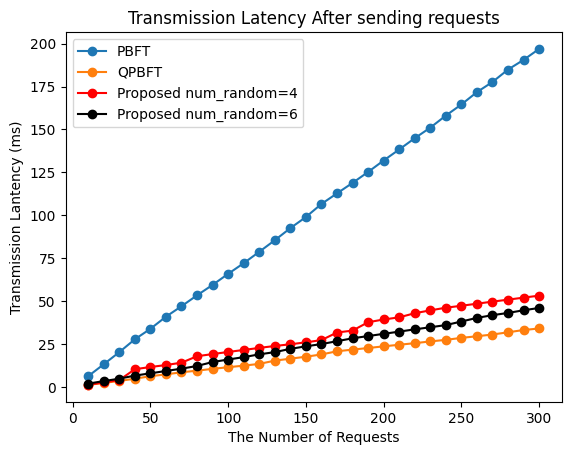

In [143]:
import matplotlib.pyplot as plot

plot.plot(num_requests, result_pbft_TL_PPMS["delays"], label = "PBFT", marker="o")
plot.plot(num_requests, result_qpbft_TL_PPMS["delays"], label = "QPBFT", marker="o")
plot.plot(num_requests, result_proposed_TL_PPMS_1["delays"], label = "Proposed num_random=4", color="red", marker="o")
plot.plot(num_requests, result_proposed_TL_PPMS_2["delays"], label = "Proposed num_random=6", color="black", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("Transmission Lantency (ms)")
plot.title("Transmission Latency After sending requests")
plot.show()

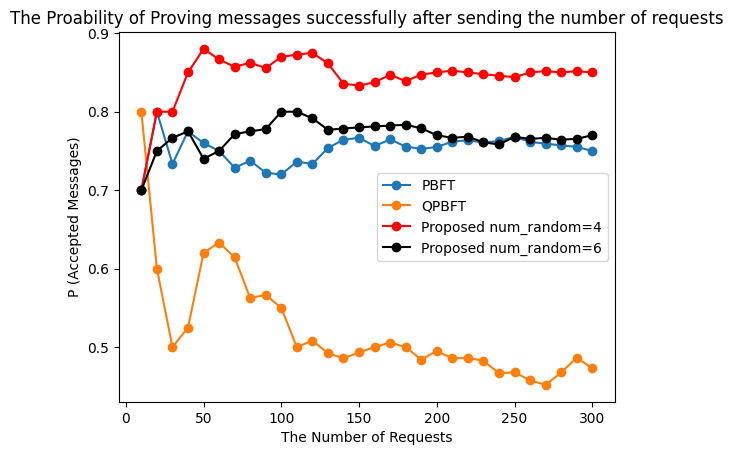

In [144]:
plot.plot(num_requests, result_pbft_TL_PPMS["probabilities"], label = "PBFT", marker="o")
plot.plot(num_requests, result_qpbft_TL_PPMS["probabilities"], label = "QPBFT", marker="o")
plot.plot(num_requests, result_proposed_TL_PPMS_1["probabilities"], label = "Proposed num_random=4", color="red", marker="o")
plot.plot(num_requests, result_proposed_TL_PPMS_2["probabilities"], label = "Proposed num_random=6", color="black", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("P (Accepted Messages)")
plot.title("The Proability of Proving messages successfully after sending the number of requests")
plot.show()